In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker 

def preprocessing() -> (pd.DataFrame, list[int]):
    '''
        원하는 기간의 데이터를 병합
        output : 병합된 데이터를 DataFrame 형태로 반환
    '''
    start_year = 2000
    end_year = 2020
    
    years = list(range(start_year,end_year+1))
    k_pop=[0]*len(years)
    for i in range(len(years)):
        k_pop[i] = pd.read_csv('Pandas/archive/KPopHits'+str(years[i])+'.csv',encoding='utf-8')
        k_pop[i]['year'] = years[i]
    k_pops = pd.concat(k_pop, ignore_index = True)

    return k_pops, years

system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")
    


In [6]:
# 김민정

#시스템 보정
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

# '코케'인 데이터의 title, artist 재정의
def revise_koke(df) :
    j=0
    for i in range(727) :
        if df['artist/s'][i] == '코케' :
            #print('koke')
            df['title'][i] = new_title[j][0]
            df['artist/s'][i] = new_title[j][1]
            j=j+1

#가수의 yy년에 낸 히트곡의 개수를 반환하는 함수
def count_num(yy, L_artist) :
    num_of_song=[]
    for i in range(len(artist)) :
        if artist[i] in L_artist :
            num_of_song.append(L_artist.count(artist[i]))
        else :
            num_of_song.append(0)
    return num_of_song

#그래프 표현
def show_graph(name):
    S_artist = my_df.loc[name]
    L_key = S_artist.keys().tolist()
    L_artist = S_artist.values.tolist()

    plt.figure(figsize=(18,4))
    plt.title('2000~2021 {0}의 히트곡 개수'.format(name))
    plt.legend(loc=3)
    plt.xticks(L_key)

    plt.plot(L_key, L_artist, marker='o', color = 'blue', label=name)
    
    plt.show()

def set_data(name):
    S_artist = my_df.loc[name]
    L_artist = S_artist.values.tolist()
    return L_artist

#다중 그래프 표현
def show_graph2():
    name=input('가수 이름 입력: ')
             
    S_artist = my_df.loc[name]
    L_key = S_artist.keys().tolist()
    L_artist = S_artist.values.tolist()

    plt.figure(figsize=(18,4))
    plt.title('히트곡 개수 비교')
    
    plt.xticks(L_key)

    plt.plot(L_key, L_artist, marker='o', color = 'blue', label=name)

    while True:
        reply = input('추가하시겠습니까? Y/N :')
        if reply == 'N' :
            break
        elif reply == 'Y' :
            name=input('가수 이름 입력: ')
            plt.plot(L_key, set_data(name), marker='o', color = 'blue', label=name)
        else :
           print('Y/N 중에 입력하세요')

    plt.legend(loc=3)
    plt.show()

#전처리
concat_df, years = preprocessing()

#print(concat_df['title'][concat_df['artist/s'] == '코케'])  #<<확인용

#artist가 '코케'인 데이터 title 열 보정
new_title=[]
S_koke = concat_df['title'][concat_df['artist/s'] == '코케'] #가수이름이 koke인 놈들 시리즈
L_koke = S_koke.values.tolist() #가수이름이 koke인 놈들 리스트
for i in range(len(L_koke)) :
    new_title.append(L_koke[i].split(' : Originally Performed By ')) #1차 split 완료
    new_title[i][1] = new_title[i][1].split(' ')[0] #2차 split 완료

# '코케'인 데이터의 title, artist 재정의
revise_koke(concat_df)

#print(concat_df['title'][concat_df['artist/s'] == '오렌지캬라멜'])  #<<확인용

# i 해의 아티스트 리스트 (콜라보 보정 완료)
artist_of_years={}
for i in range(2000, 2021) :
    artist_of_year=[]
    S_year = concat_df['artist/s'][concat_df['year'] == i] #i해의 아티스트 시리즈
    L_year = S_year.values.tolist() #i해의 아티스트 리스트
    for j in range(len(L_year)) :
        artist_of_year.extend(L_year[j].split(', '))
    #print(i,': ', artist_of_year) # 특정 해에 히트곡을 낸 가수들의 리스트
    artist_of_years[i] = artist_of_year #딕셔너리 형태로 저장

#print(artist_of_years)  <<확인용 


#unique한 artist list 생성
def set_artist(L1) :
    for i in range(len(L1)) :
        if L1[i] not in artist :
            artist.append(L1[i])

artist=[]
for i in range(2000,2021) :
    set_artist(artist_of_years[i])

#print(artist) #<<확인용


#내 데이터프레임 생성하기
my_dic={}
for i in range(2000, 2021) :
    my_dic[i] = count_num(i, artist_of_years[i])

my_col = list(range(2000,2021))

my_df = pd.DataFrame(my_dic, columns = my_col, index=artist)


#특정 가수의 히트곡 개수 보기
name = input('가수 이름 입력: ')
show_graph(name)

#여러 가수의 히트곡 개수 비교
show_graph2()

C:\Users\popcorn\AppData\Local\Temp/ipykernel_14644/411643112.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'][i] = new_title[j][0]
C:\Users\popcorn\AppData\Local\Temp/ipykernel_14644/411643112.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist/s'][i] = new_title[j][1]


KeyboardInterrupt: Interrupted by user

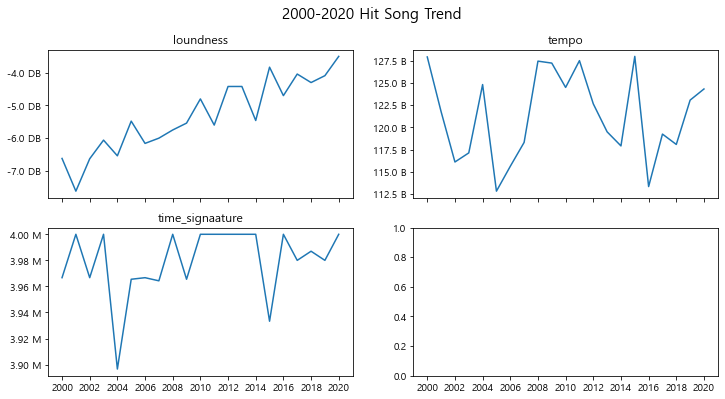

In [7]:
#채지혜

#전처리
kpop_df1, year_list = preprocessing()

loudness_list = []
for i in range(0, 21):
    hap = round(kpop_df1[kpop_df1['year'] == 2000 + i]['loudness'].mean(),2)
    loudness_list.append(hap)

len(loudness_list)

tempo_list = []
for i in range(0, 21):
    hap = round(kpop_df1[kpop_df1['year'] == 2000 + i]['tempo'].mean(),4)
    tempo_list.append(hap)
    
len(tempo_list)

time_signature = []
for i in range(0, 21):
    hap = round(kpop_df1[kpop_df1['year'] == 2000 + i]['time_signature'].mean(),4)
    time_signature.append(hap)
    
time_signature

x = year_list

y1 = loudness_list
y2 = tempo_list
y3 = time_signature 

fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=False)
fig.suptitle('2000-2020 Hit Song Trend', fontsize=15)

plt.subplot(2, 2, 1)
plt.plot(x, y1)
plt.title('loundness')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f DB'))
plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title('tempo')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f B'))
plt.subplot(2, 2, 3)
plt.plot(x, y3)
plt.title('time_signaature')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f M'))


plt.xticks(list(range(2000, 2021, 2)))

plt.show()

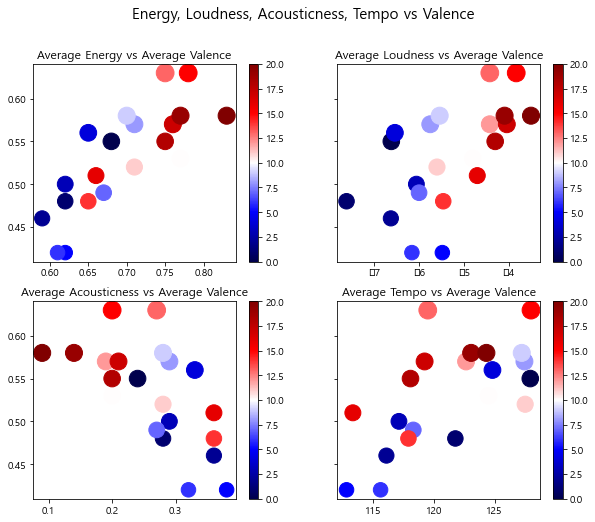

In [10]:
#김경일

#전처리
k, year_list = preprocessing()

year_df = k[k['year'] >= 2000] 

year_list = list(range(2000,2021))

avg_v = []
avg_e = []
avg_l = []
avg_a = []
avg_t = []
avg_d = []


for i in year_list:
    year_df = k[k['year'] == i]
    avg_v.append(round(year_df['valence'].mean(), 2))
    avg_e.append(round(year_df['energy'].mean(), 2))
    avg_l.append(round(year_df['loudness'].mean(), 2))
    avg_a.append(round(year_df['acousticness'].mean(), 2))
    avg_t.append(round(year_df['tempo'].mean(), 2))
    avg_d.append(round(year_df['duration_ms'].mean(), 2))
    
x1 = avg_e
x2 = avg_l
x3 = avg_a
x4 = avg_t
y = avg_v
size = []

for item in y:
    size.append(item*500)

fig, aces = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
fig.suptitle('Energy, Loudness, Acousticness, Tempo vs Valence', fontsize=15)

plt.subplot(2, 2, 1)
plt.scatter(x1, y, s=size,
           c=range(21), cmap='seismic')
plt.title('Average Energy vs Average Valence')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.scatter(x2, y, s=size,
           c=range(21), cmap='seismic')
plt.title('Average Loudness vs Average Valence')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.scatter(x3, y, s=size,
           c=range(21), cmap='seismic')
plt.title('Average Acousticness vs Average Valence')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.scatter(x4, y, s=size,
           c=range(21), cmap='seismic')
plt.title('Average Tempo vs Average Valence')
plt.colorbar()

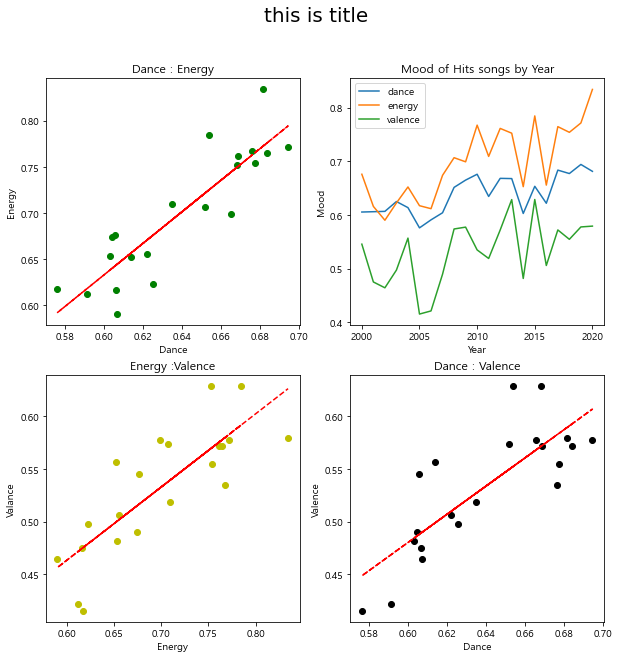

In [13]:
#김송
#전처리
k_pop_df, year_list = preprocessing()

def plotcharts(dance, energy, valence, title = ' '):

    fig, axes = plt.subplots(2,2 , figsize=(10,10), sharex = False, sharey = False)

    plt.subplot(2,2,1)
    plt.scatter(dance, energy, c='g')
    z = np.polyfit(dance, energy, 1)
    p = np.poly1d(z)
    plt.plot(dance,p(dance),"r--")
    plt.title('Dance : Energy')
    plt.xlabel('Dance')
    plt.ylabel('Energy')


    plt.subplot(2,2,2)
    plt.plot(year_list, dance, label = 'dance')
    plt.plot(year_list, energy, label = 'energy')
    plt.plot(year_list, valence, label = 'valence')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Mood')
    plt.title('Mood of Hits songs by Year')
    
    plt.subplot(2,2,3)
    plt.scatter(energy,valence,c= 'y')
    z = np.polyfit(energy, valence, 1)
    p = np.poly1d(z)
    plt.plot(energy,p(energy),"r--")
    plt.title('Energy :Valence')
    plt.xlabel('Energy')
    plt.ylabel('Valance')

    plt.subplot(2,2,4)
    plt.scatter(dance, valence, c= 'k')
    z = np.polyfit(dance, valence, 1)
    p = np.poly1d(z)
    plt.plot(dance,p(dance),"r--")
    plt.title('Dance : Valence')
    plt.xlabel('Dance')
    plt.ylabel('Valence')
    
    plt.suptitle(title, font ='DejaVu Sans', fontsize = '20',)

    plt.show()

dance =list(k_pop_df.groupby('year')['danceability'].mean())
energy = list(k_pop_df.groupby('year')['energy'].mean ())
valence = list(k_pop_df.groupby('year')['valence'].mean())
    
plotcharts(dance, energy, valence, 'this is title')